In [1]:
!pip install lightkurve

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11390 sha256=f5f29f7ca4567382c1e60bcb77222e2dcd3c507f9730f72ccbaac9e994e3a1b1
  Stored in directory: c:\users\33313\appdata\local\pip\cache\wheels\04\15\cd\2f622795b09e83471a3be5d2581cd9cf96a6ec7aa78e8deffe
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50518 sha256=0f89e3dd3ac07eebd9eae79d810639ca9b57f332a4b15d7820e746cad1eab58b
  Stored in directory: c:\users\33313\appdata\local\pip\cache\wheels\26\35\02\90618fc7cbf03a335f3cacd59d32b35930bf5a57f3c0d0814c
  Created wheel for oktopus: filename=oktopus-0.1.2-

## 係外行星：以Kepler-10為例



In [ ]:
# NOTE: 無法執行
# import lightkurve as lk
# from bokeh.io import output_notebook
# output_notebook()

# # 搜尋 Kepler-10 的資料
# tpf_search_result = lk.search_targetpixelfile('Kepler-10', mission='Kepler')
# tpf = tpf_search_result[0].download()

# # 減少資料量，以提高效能
# tpf_slice = tpf[0:1000]

# # 使用 interact() 顯示圖表（僅顯示，不保存）
# tpf_slice.interact()

# # 使用 plot() 方法生成靜態圖表並保存為 HTML
# # import matplotlib.pyplot as plt
# # plt.figure(figsize=(10, 6))
# # tpf_slice.plot()
# # plt.savefig('kepler10_lightcurve.png')
# # plt.show()


Loading BokehJS ...

ERROR:bokeh.server.views.ws:Refusing websocket connection from Origin 'vscode-webview://0ko65fiahd4b2fmr0c2a9vpknrdnn0hbif52v21qc0riqbcdjvn6';                       use --allow-websocket-origin=0ko65fiahd4b2fmr0c2a9vpknrdnn0hbif52v21qc0riqbcdjvn6 or set BOKEH_ALLOW_WS_ORIGIN=0ko65fiahd4b2fmr0c2a9vpknrdnn0hbif52v21qc0riqbcdjvn6 to permit this; currently we allow origins {'localhost:8888'}


可能的行星軌道週期：0.331 天


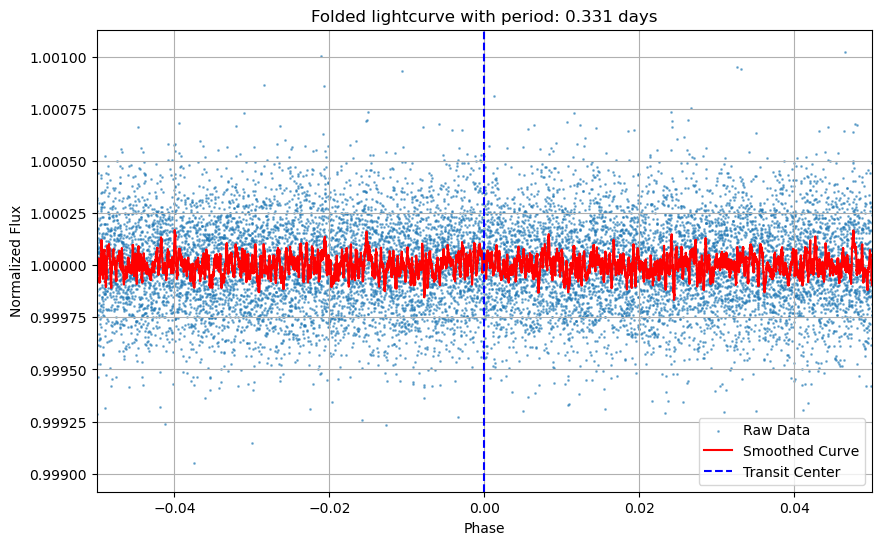

In [12]:
import lightkurve as lk
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import numpy as np

# 定義用於取得 Kepler 的光變曲線資料的函式
def get_kepler_lightcurve(target):
    search_result = lk.search_lightcurve(target, mission='Kepler')
    lc = search_result[0].download()
    return lc

# 定義用於處理光變曲線的函式
def preprocess_lightcurve(lc):
    processed_lc = lc.flatten()
    processed_lc = processed_lc.remove_outliers()
    return processed_lc

# 定義用於尋找光變曲線週期的函式
def find_lc_period(lc):
    periodogram = lc.to_periodogram(method='bls')
    lc_period = periodogram.period_at_max_power
    if hasattr(lc_period, 'value'):
        return lc_period.value
    return float(lc_period)

# 定義用於繪製摺疊光變曲線的函式
def plot_folded_lightcurve(lc, lc_period):
    folded_lc = lc.fold(period=lc_period)
    
    # 轉換 phase 和 flux 為 float
    phase = folded_lc.phase.value if hasattr(folded_lc.phase, 'value') else folded_lc.phase
    flux = folded_lc.flux.value if hasattr(folded_lc.flux, 'value') else folded_lc.flux
    
    # 過濾掉 NaN 值
    mask = np.isfinite(phase) & np.isfinite(flux)
    phase = phase[mask]
    flux = flux[mask]

    # 平滑光變曲線資料
    smoothed_flux = savgol_filter(flux, 51, 3)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(phase, flux, s=1, alpha=0.5, label='Raw Data')
    plt.plot(phase, smoothed_flux, color='red', label='Smoothed Curve')
    plt.axvline(0, color='blue', linestyle='--', label='Transit Center')
    plt.xlabel('Phase')
    plt.ylabel('Normalized Flux')
    plt.title(f'Folded lightcurve with period: {lc_period:.3f} days')
    plt.legend()
    plt.grid(True)
    plt.xlim(-0.05, 0.05)
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 12  # 設定字體大小
    plt.show()

# 下載 Kepler-10 的光變曲線
lc = get_kepler_lightcurve('Kepler-10')
processed_lc = preprocess_lightcurve(lc)
lc_period = find_lc_period(processed_lc)

print(f'可能的行星軌道週期：{lc_period:.3f} 天')

# 繪製摺疊後的光變曲線，以便看出更清晰的凌日現象
plot_folded_lightcurve(processed_lc, lc_period)
